In [1]:
# сравнение решающих деревьев и линейной модели на примере
# датасета boston housing

ImportError: cannot import name 'cross_validation' from 'sklearn' (C:\Users\Matveider\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\__init__.py)

In [2]:
%matplotlib inline
import sklearn
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn

In [3]:
data = datasets.load_boston()

C:\Users\Matveider\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets includ

In [4]:
# датасет

AttributeError: head

In [5]:
X = data['data']
y = data['target']

In [6]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
# размер

NameError: name 'X_train' is not defined

In [8]:
number_of_rows = X.shape[0]

In [9]:
print(number_of_rows)

506


In [11]:
X_train = X[:-127]
y_train = y[:-127]

X_test = X[-127:]
y_test = y[-127:]

In [12]:
# 127 - это 25% от 506(общего числа записей)

In [14]:
def gbm_predict(X, base_algorithms_list, coefficients_list):
    return [sum([coeff * algo.predict([x])[0] for algo, coeff in zip(base_algorithms_list, coefficients_list)]) for x in X]

In [15]:
base_algorithms_list1 = []
coefficients_list1 = []
train_scores1 = []
test_scores1 = []

for i in range(50):
    clf = tree.DecisionTreeRegressor(max_depth = 5, random_state = 42)
    if i == 0:
        clf.fit(X_train, y_train)    
    else:
        prediction = gbm_predict(X_train, base_algorithms_list1, coefficients_list1)
        s = y_train - prediction
        clf.fit(X_train, s)
    
    base_algorithms_list1.append(clf)
    coefficients_list1.append(0.9)
    train_scores1.append(metrics.mean_squared_error(y_train, gbm_predict(X_train, base_algorithms_list1, coefficients_list1)))
    test_scores1.append(metrics.mean_squared_error(y_test, gbm_predict(X_test, base_algorithms_list1, coefficients_list1)))

Text(0, 0.5, 'MSE')

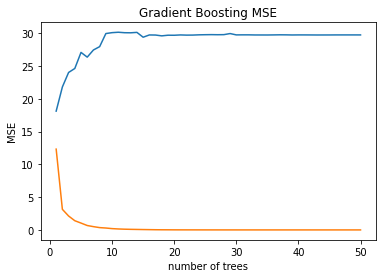

In [18]:
plt.plot(np.arange(1, 51, 1), test_scores1, label = 'test scores')
plt.plot(np.arange(1, 51, 1), train_scores1, label = 'train scores')
plt.title('Gradient Boosting MSE')
plt.xlabel('number of trees')
plt.ylabel('MSE')

In [19]:
metrics.mean_squared_error(y_test, gbm_predict(X_test, base_algorithms_list1, coefficients_list1))**0.5

5.455623403859612

In [20]:
base_algorithms_list2 = []
coefficients_list2 = []
train_scores2 = []
test_scores2 = []

for i in range(50):
    clf = tree.DecisionTreeRegressor(max_depth = 5, random_state = 42)
    if i == 0:
        clf.fit(X_train, y_train)    
    else:
        prediction = gbm_predict(X_train, base_algorithms_list2, coefficients_list2)
        s = y_train - prediction
        clf.fit(X_train, s)
    
    base_algorithms_list2.append(clf)
    coefficients_list2.append(0.9/(i + 1.0))
    train_scores2.append(metrics.mean_squared_error(y_train, gbm_predict(X_train, base_algorithms_list2, coefficients_list2)))
    test_scores2.append(metrics.mean_squared_error(y_test, gbm_predict(X_test, base_algorithms_list2, coefficients_list2)))

Text(0, 0.5, 'MSE')

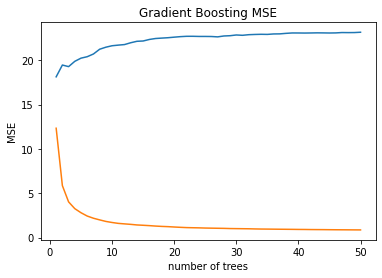

In [21]:
plt.plot(np.arange(1, 51, 1), test_scores2, label = 'test scores')
plt.plot(np.arange(1, 51, 1), train_scores2, label = 'train scores')
plt.title('Gradient Boosting MSE')
plt.xlabel('number of trees')
plt.ylabel('MSE')

In [22]:
metrics.mean_squared_error(y_test, gbm_predict(X_test, base_algorithms_list2, coefficients_list2))**0.5

4.812550945781193

In [24]:
# зависимость от числа деревьев
number_trees = np.arange(5, 1000, 5)
train_scores = []
test_scores = []

for tree in number_trees:
    print(tree),
    clf = ensemble.GradientBoostingRegressor(n_estimators = tree)
    clf.fit(X_train, y_train)
    train_scores.append(metrics.mean_squared_error(y_train, clf.predict(X_train)))
    test_scores.append(metrics.mean_squared_error(y_test, clf.predict(X_test)))

5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735
740
745
750
755
760
765
770
775
780
785
790
795
800
805
810
815
820
825
830
835
840
845
850
855
860
865
870
875
880
885
890
895
900
905
910
915
920
925
930
935
940
945
950
955
960
965
970
975
980
985
990
995


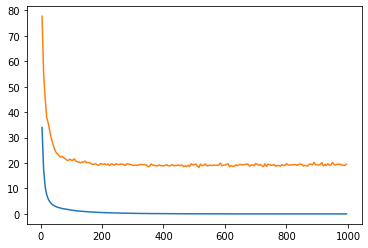

In [27]:
plt.plot(number_trees, train_scores)
plt.plot(number_trees, test_scores)

In [29]:
# зависимость от глубины деревьев
tree_depth = np.arange(1, 51, 2)
train_scores = []
test_scores = []

for depth in tree_depth:
    print(depth),
    clf = ensemble.GradientBoostingRegressor(max_depth = depth)
    clf.fit(X_train, y_train)
    train_scores.append(metrics.mean_squared_error(y_train, clf.predict(X_train)))
    test_scores.append(metrics.mean_squared_error(y_test, clf.predict(X_test)))

1
3
5
7
9
11
13
15
17
19
21
23
25
27
29
31
33
35
37
39
41
43
45
47
49


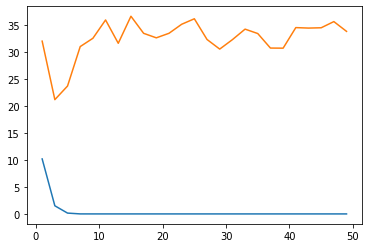

In [30]:
plt.plot(tree_depth, train_scores)
plt.plot(tree_depth, test_scores)

In [34]:
# линейная модель на тех же данных. И ее ошибка
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [32]:
metrics.mean_squared_error(y_test, clf.predict(X_test)) ** 0.5

8.25497975354908

Text(0, 0.5, 'prediction')

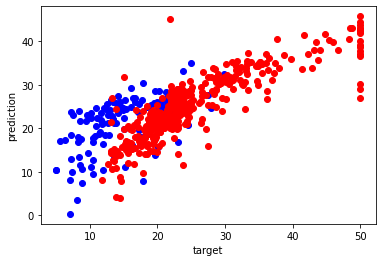

In [33]:
plt.scatter(y_test, clf.predict(X_test), color = 'blue')
plt.scatter(y_train, clf.predict(X_train), color = 'red')
plt.xlabel('target')
plt.ylabel('prediction')